In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import learning_curve

c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Load Data

In [2]:
# read csv file
data = pd.read_csv("Lung Cancer Dataset.csv")

# Data Preprocessing

In [3]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [4]:
# Display the first few rows of the dataset to understand its structure
data.head(25)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [5]:
#show the row and column of dataset
data.shape

(5000, 18)

In [6]:
#check is any missing value or null value
missing_values = data.isnull().sum()
print(missing_values)

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert 'PULMONARY_DISEASE' to binary (YES -> 1, NO -> 0)
data['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(data['PULMONARY_DISEASE'])

In [8]:
# Features and Target
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

In [9]:
#show the row and column of dataset after preprocess
data.shape

(5000, 18)

In [10]:
# split data 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
#show records of each features
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000,1.0000


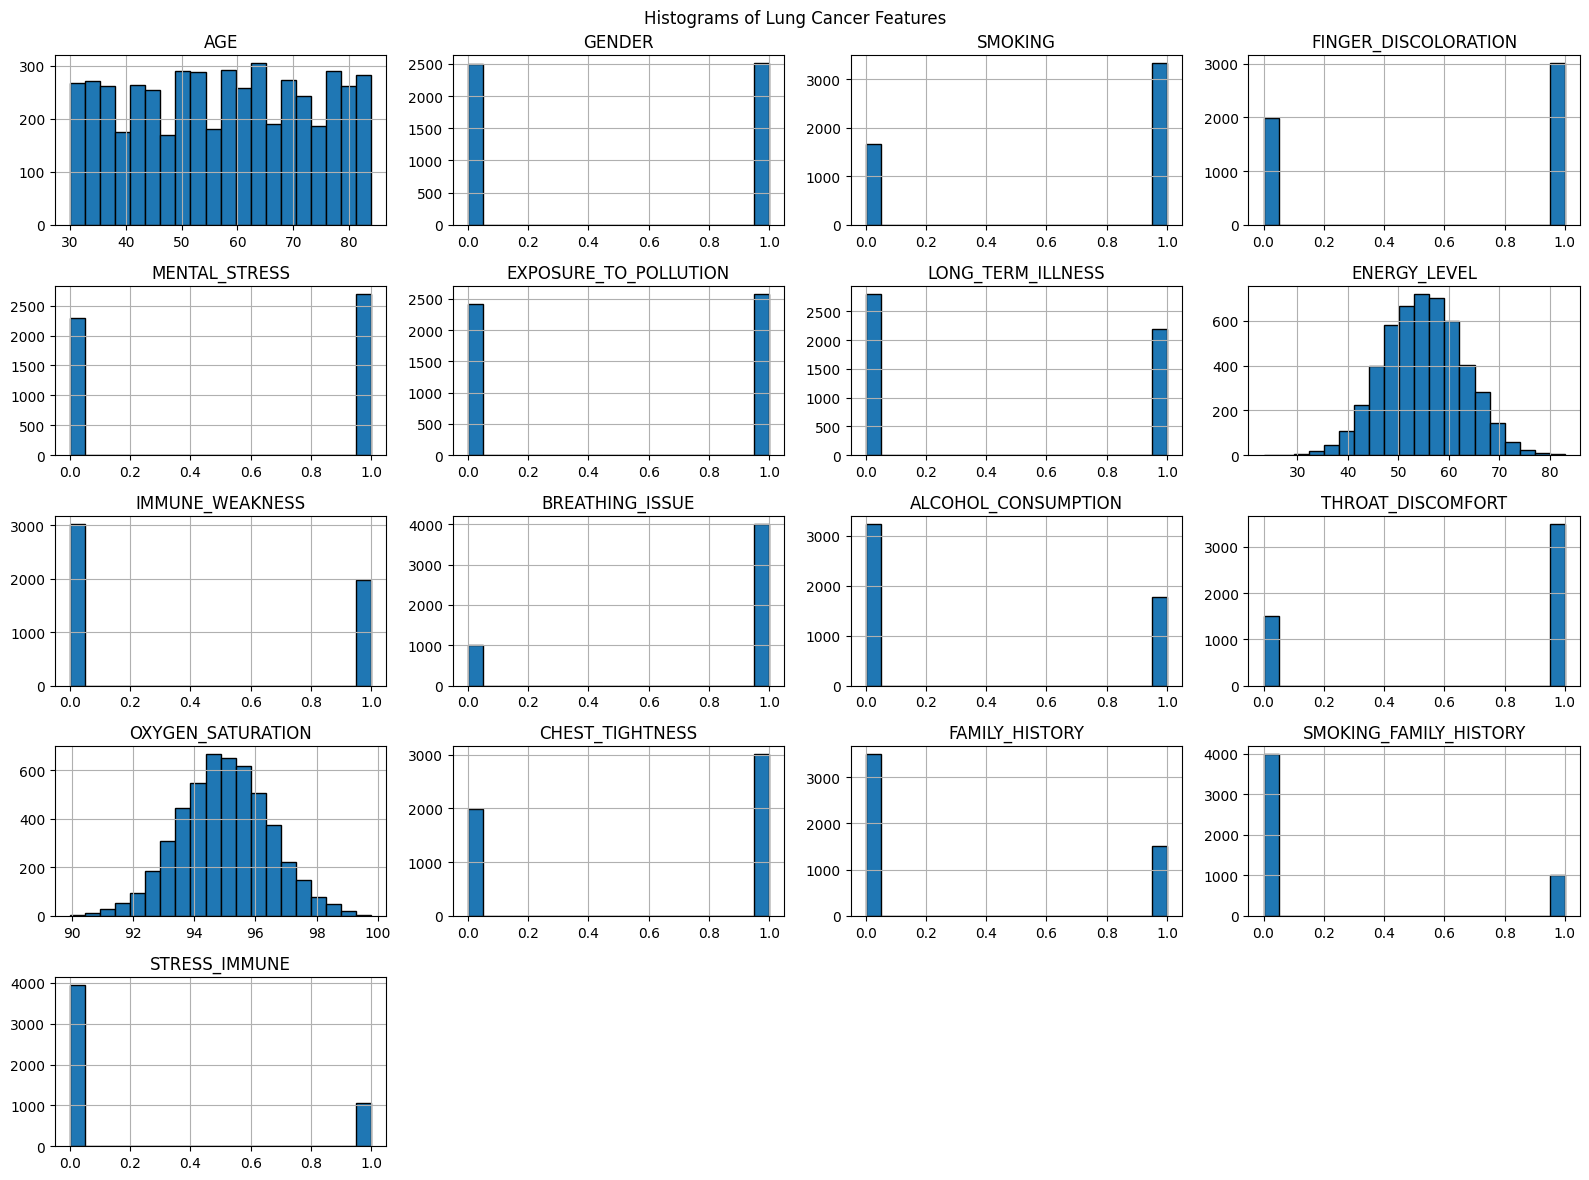

In [12]:
data.drop('PULMONARY_DISEASE', axis=1).hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Histograms of Lung Cancer Features")
plt.tight_layout()
plt.show()

# Model Training

# SVM Model (Non-Hypertune)

In [13]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred_svm = svm_model.predict(X_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Model")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_svm))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model
Training Accuracy: 0.88725
Test Accuracy: 0.893

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2392
           1       0.85      0.88      0.86      1608

    accuracy                           0.89      4000
   macro avg       0.88      0.89      0.88      4000
weighted avg       0.89      0.89      0.89      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       571
           1       0.86      0.90      0.88       429

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



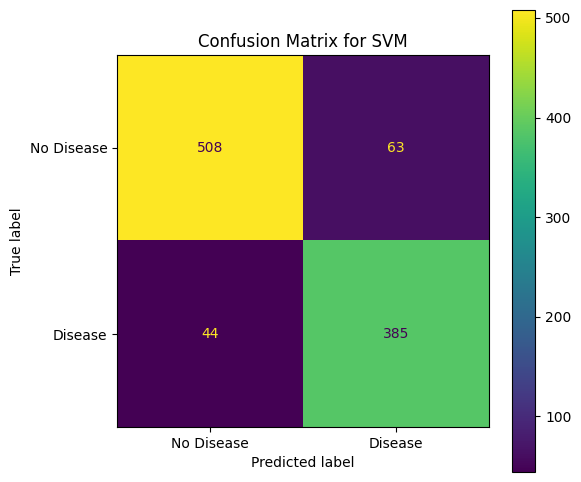

In [14]:
# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Disease', 'Disease'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix for SVM')
disp_svm.plot(ax=ax)
plt.show()


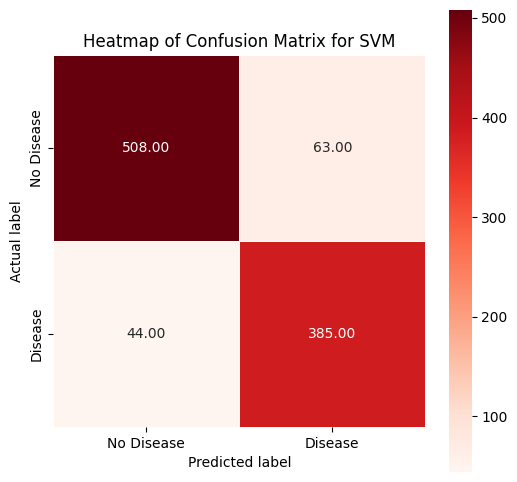

In [15]:
# Plot heatmap for SVM
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()



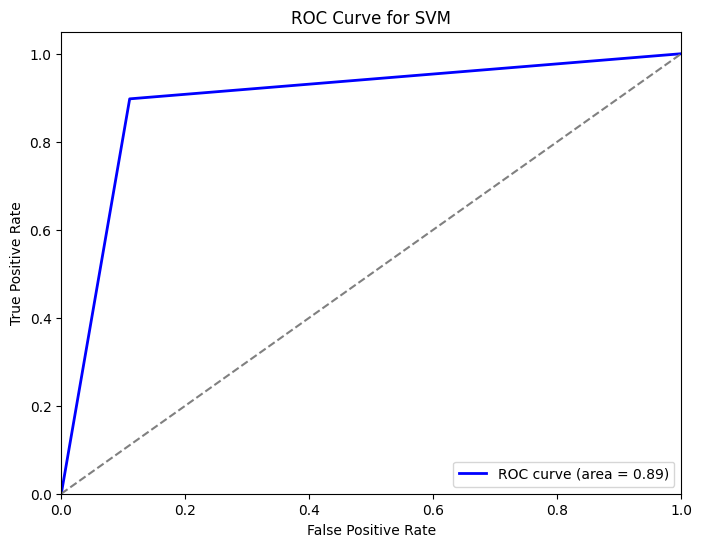

In [16]:
# SVM ROC Curve
y_scores_svm = svm_model.predict(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

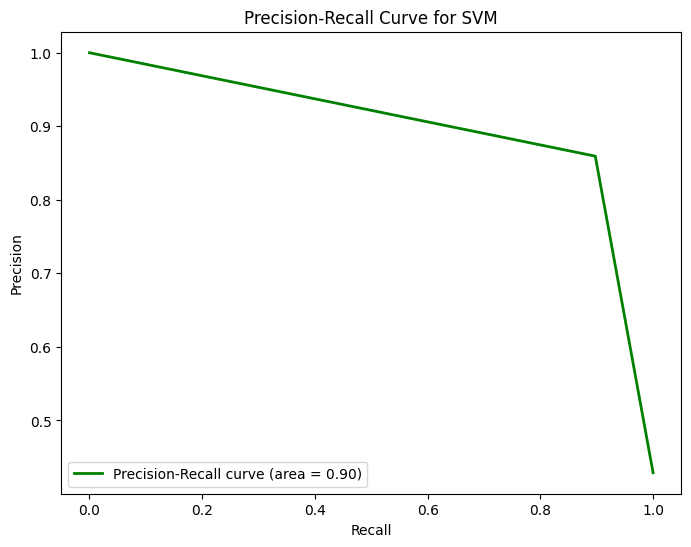

In [17]:
# SVM Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='green', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc_svm))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.show()

In [18]:
#learning plot curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

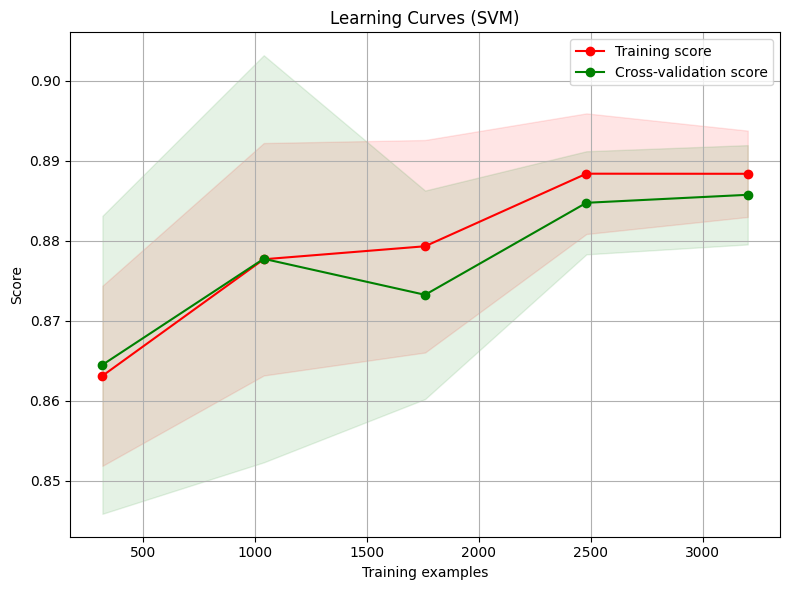

In [19]:
# Plot learning curves for SVM
plot_learning_curve(svm_model, "Learning Curves (SVM)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# SVM Hypertuning

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid_svm = {
    'C': [0.5, 0.7, 0.9, 1.0, 1.2],
    'gamma': [0.0005, 0.001, 0.002, 0.005],
    'kernel': ['rbf']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)

# Best model
best_svm = grid_svm.best_estimator_

# Print best parameters and CV score
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_svm.best_score_)

# Predictions
y_train_pred_svm = best_svm.predict(X_train)
y_test_pred_svm = best_svm.predict(X_test)

# Evaluation
print("\nSVM Model Evaluation:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_svm))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_svm))


Best parameters for SVM: {'C': 0.7, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.8915

SVM Model Evaluation:
Training Accuracy: 0.88825
Test Accuracy: 0.895

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2392
           1       0.86      0.87      0.86      1608

    accuracy                           0.89      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.89      0.89      0.89      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       571
           1       0.87      0.89      0.88       429

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000



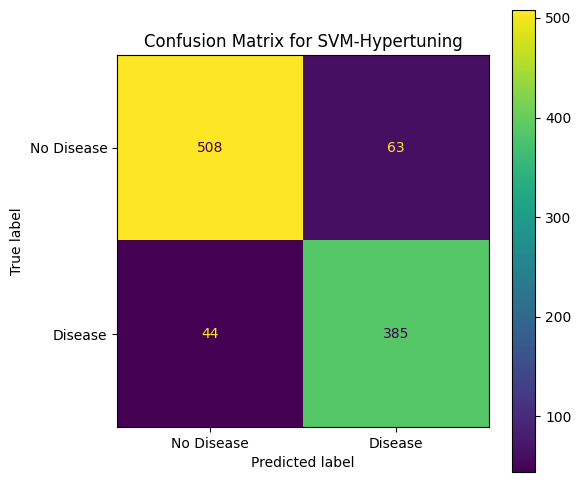

In [45]:
# Generate confusion matrix for SVM (Hypertuning)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Disease', 'Disease'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix for SVM-Hypertuning')
disp_svm.plot(ax=ax)
plt.grid(False)
plt.show()


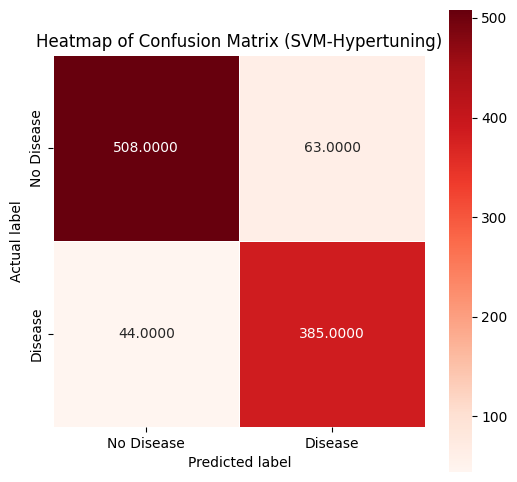

In [46]:
# Plot heatmap for SVM(Hypertuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='.4f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix (SVM-Hypertuning)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

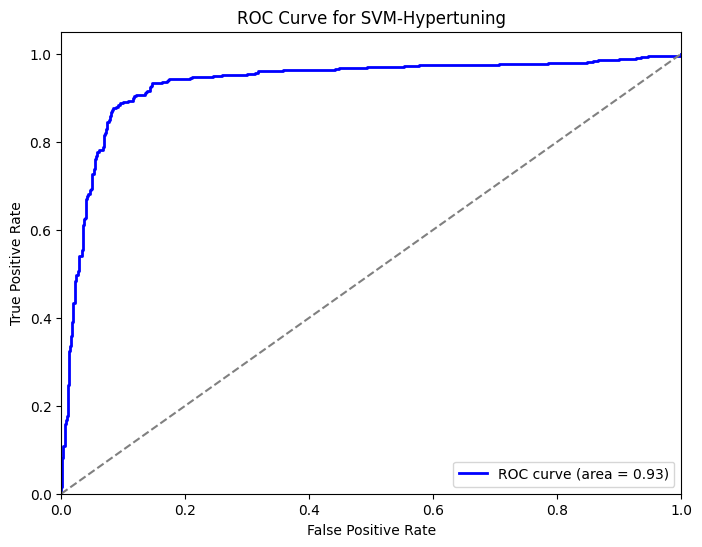

In [47]:
# SVM ROC Curve (Hypertuning)
y_scores_svm = grid_svm.best_estimator_.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM-Hypertuning')
plt.legend(loc='lower right')
plt.show()

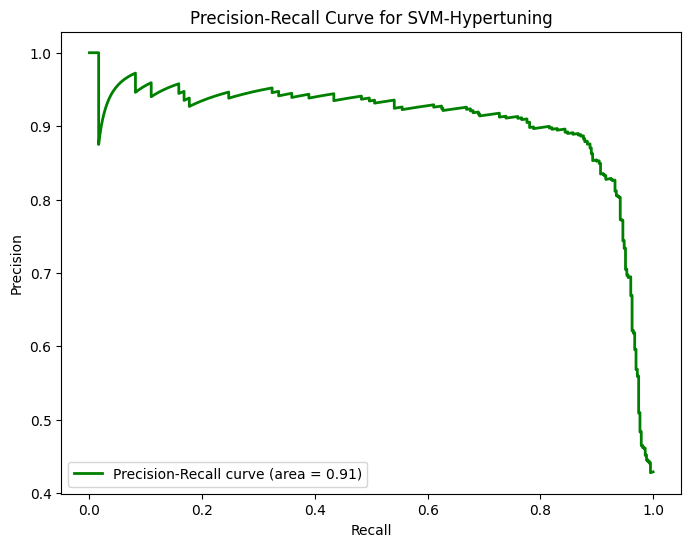

In [48]:
# SVM Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='green', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc_svm))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM-Hypertuning')
plt.legend(loc='lower left')
plt.show()

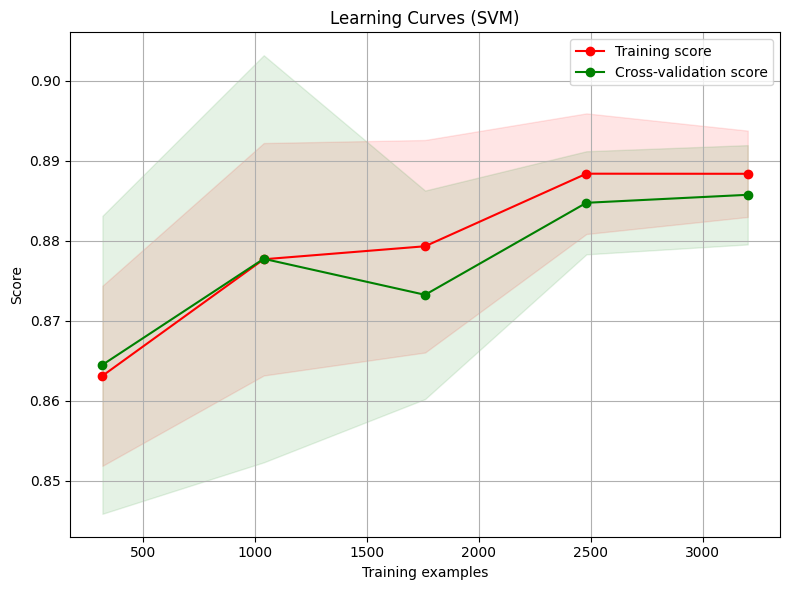

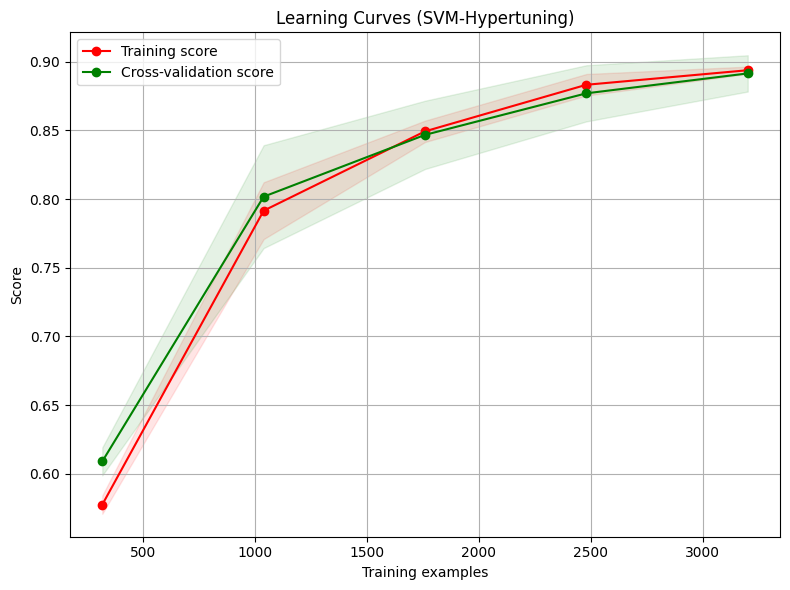

In [49]:
# Plot learning curves for SVM (before hypertuning)
plot_learning_curve(
    svm_model, 
    "Learning Curves (SVM)", 
    X_train, y_train, cv=5, n_jobs=-1
)
plt.show()

# Plot learning curves for SVM(Hypertuning)
plot_learning_curve(
    grid_svm.best_estimator_, 
    "Learning Curves (SVM-Hypertuning)", 
    X_train, y_train, cv=cv, n_jobs=-1
)
plt.show()